In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
from astropy.table import Table
t = Table.read('Data/TGAS_d125_Wright03.vot', format='votable')

#print(t)

In [4]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']


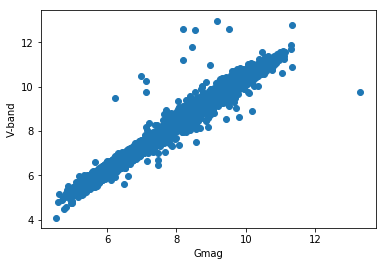

In [5]:
Gmag = t['__Gmag_']
Vband = t['VTmag']
plt.scatter(Gmag,Vband)
plt.xlabel('Gmag')
plt.ylabel('V-band')

#### Comments

Gmag and V-band should be correlated because they both indicate the magnitudes of the stars. 
There are outliers in the data, these are the points that are not in the diagonal line across the plot that
indicates a positive correlation between Gmag and V-band. 

How to select/identify outliers?

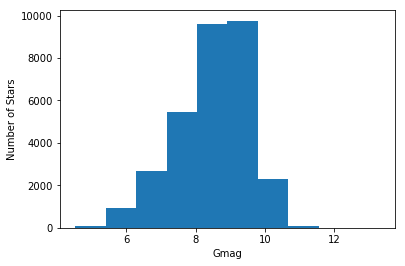

In [35]:
#Histogram of G band magnitudes
plt.hist(Gmag)
plt.xlabel('Gmag')
plt.ylabel('Number of Stars')

#### Comments
Most stars seem to have G magnitudes that are around 8 or 9

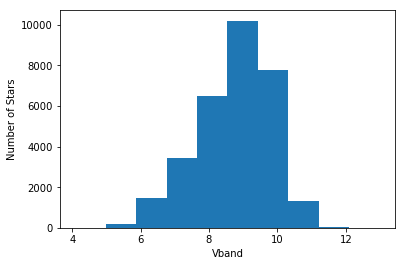

In [36]:
#Histogram of V band magnitudes
plt.hist(Vband)
plt.xlabel('Vband')
plt.ylabel('Number of Stars')

#### Comments

The histogram of V-band magnitudes is similar to the histogram of G magnitudes

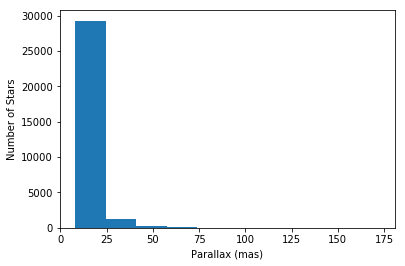

In [38]:
#Histogram of parallaxes
plx = t['Plx']
plt.hist(plx)
plt.xlabel('Parallax (mas)')
plt.ylabel('Number of Stars')

#### Comments

Most stars seem to have parallaxes that are smaller than 25 mas. The data was chosen so that the stars had parallaxes greater than 8 mas. 

There is another variable d_arcsec. What is d_arcsec?

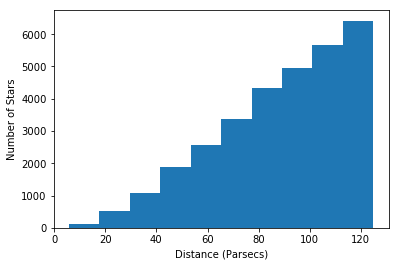

In [40]:
#Histogram of distances
d = 1/(plx/1000)
plt.hist(d)
plt.xlabel('Distance (Parsecs)')
plt.ylabel('Number of Stars')

#### Comments

This histogram makes sense, since I limited the search to stars closer than 120 parsecs. There should be more stars that are further away from the earth, than closer, so the increase in number with distance also makes sense. 

In [58]:
#Histogram of absolute magnitudes

l = np.array([])
for i in d: np.append(l, math.log10(i/10))
print(l)
#Abs_Mag = Gmag - 5*l


[]


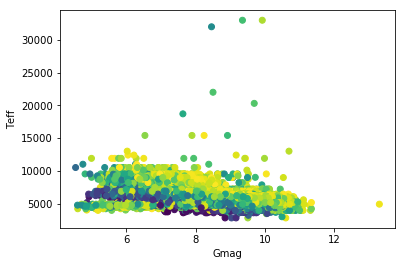

In [51]:
#Teff vs. Gmag
Teff = t['Teff']
plt.scatter(Gmag, Teff, c = d)
plt.xlabel('Gmag')
plt.ylabel('Teff')

#### Comments

which variable indicates absolute parallax?